# Importando coisas

In [110]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Declarando variáveis

In [111]:
T = 8      # Tempo de buffering Alvo
Bdanger = 3
N2 = 0.25   # Reduzir
N1 = 0.5    # Reduzir pouco
Z = 1       # Não alterar
P1 = 1.5    # Aumentar pouco
P2 = 2      # Aumentar

# Declarando antecedentes e consequentes (universos)

In [117]:
bSize = ctrl.Antecedent(np.arange(0, 3*T/4+0.5, 0.5), 'Buffering size B')
print(np.arange(0, 3*T/4+0.5, 0.5))

bSizeDiff = ctrl.Antecedent(np.arange(-3, 3, 1), 'Buffering size diff ΔB (b)')
print(np.arange(-3, 4, 1))

rate = ctrl.Antecedent(np.arange(0, 2.2, 0.2), 'Bit Rate')
print(np.arange(0, 2.2, 0.2))

factor = ctrl.Consequent(np.arange(0, 2.05, 0.05), 'Factor')
print(np.arange(0, 2.05, 0.05))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
[-3 -2 -1  0  1  2  3]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


# Montando membership functions + vendo resultados

C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a n

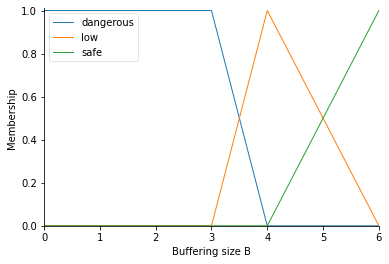

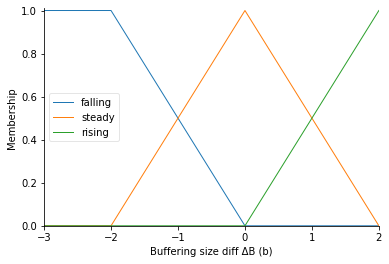

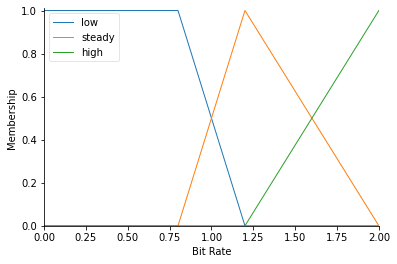

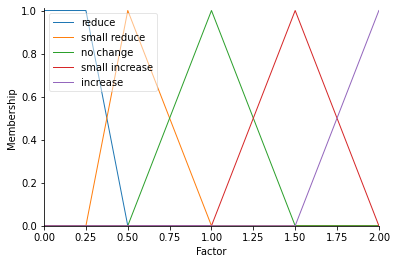

In [119]:
# Buffer Size
bSize['dangerous'] = fuzz.trapmf(bSize.universe, [0, 0, Bdanger, T/2])
bSize['low'] = fuzz.trimf(bSize.universe, [Bdanger, T/2, 3*T/4])
bSize['safe'] = fuzz.trimf(bSize.universe, [T/2, 3*T/4, T])

# Diferencial do Buffer Sizer
bSizeDiff['falling'] = fuzz.trapmf(bSizeDiff.universe, [-3, -3, -2, 0])
bSizeDiff['steady'] = fuzz.trimf(bSizeDiff.universe, [-2, 0, 2])
bSizeDiff['rising'] = fuzz.trimf(bSizeDiff.universe, [0, 2, 2])

# Taxa de bits
rate['low'] = fuzz.trapmf(rate.universe, [0, 0, 0.8, 1.2])
rate['steady'] = fuzz.trimf(rate.universe, [0.8, 1.2, 2])
rate['high'] = fuzz.trimf(rate.universe, [1.2, 2, 2])

# Fator de incremento/decremento da qualidade do próximo segmento
factor['reduce'] = fuzz.trapmf(factor.universe, [0, 0, N2, N1])
factor['small reduce'] = fuzz.trimf(factor.universe, [N2, N1, Z])
factor['no change'] = fuzz.trimf(factor.universe, [N1, Z, P1])
factor['small increase'] = fuzz.trimf(factor.universe, [Z, P1, P2])
factor['increase'] = fuzz.trimf(factor.universe, [P1, P2, 2])

bSize.view()
bSizeDiff.view()
rate.view()
factor.view()

# Montando regras

In [120]:
# Buffer Dangerous
rule1 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['falling'] & rate['low'], factor['reduce'])
rule2 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['falling'] & rate['steady'], factor['reduce'])
rule3 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['falling'] & rate['high'], factor['reduce'])

rule4 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['steady'] & rate['low'], factor['reduce'])
rule5 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['steady'] & rate['steady'], factor['small reduce'])
rule6 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['steady'] & rate['high'], factor['small reduce'])

rule7 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['rising'] & rate['low'], factor['reduce'])
rule8 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['rising'] & rate['steady'], factor['small reduce'])
rule9 = ctrl.Rule(bSize['dangerous'] & bSizeDiff['rising'] & rate['high'], factor['small reduce'])

# Buffer Low
rule10 = ctrl.Rule(bSize['low'] & bSizeDiff['falling'] & rate['low'], factor['small reduce'])
rule11 = ctrl.Rule(bSize['low'] & bSizeDiff['falling'] & rate['steady'], factor['no change'])
rule12 = ctrl.Rule(bSize['low'] & bSizeDiff['falling'] & rate['high'], factor['no change'])

rule13 = ctrl.Rule(bSize['low'] & bSizeDiff['steady'] & rate['low'], factor['no change'])
rule14 = ctrl.Rule(bSize['low'] & bSizeDiff['steady'] & rate['steady'], factor['no change'])
rule15 = ctrl.Rule(bSize['low'] & bSizeDiff['steady'] & rate['high'], factor['no change'])

rule16 = ctrl.Rule(bSize['low'] & bSizeDiff['rising'] & rate['low'], factor['no change'])
rule17 = ctrl.Rule(bSize['low'] & bSizeDiff['rising'] & rate['steady'], factor['no change'])
rule18 = ctrl.Rule(bSize['low'] & bSizeDiff['rising'] & rate['high'], factor['small increase'])

# Buffer Safe
rule19 = ctrl.Rule(bSize['safe'] & bSizeDiff['falling'] & rate['low'], factor['small increase'])
rule20 = ctrl.Rule(bSize['safe'] & bSizeDiff['falling'] & rate['steady'], factor['small increase'])
rule21 = ctrl.Rule(bSize['safe'] & bSizeDiff['falling'] & rate['high'], factor['increase'])

rule22 = ctrl.Rule(bSize['safe'] & bSizeDiff['steady'] & rate['low'], factor['small increase'])
rule23 = ctrl.Rule(bSize['safe'] & bSizeDiff['steady'] & rate['steady'], factor['small increase'])
rule24 = ctrl.Rule(bSize['safe'] & bSizeDiff['steady'] & rate['high'], factor['increase'])

rule25 = ctrl.Rule(bSize['safe'] & bSizeDiff['rising'] & rate['high'], factor['increase'])
rule26 = ctrl.Rule(bSize['safe'] & bSizeDiff['rising'] & rate['high'], factor['increase'])

rules = [
  rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
  rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
  rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26
]

## Declarando/Configurando o sistema de controle

In [121]:
FDASHControl = ctrl.ControlSystem(rules)
FDASH = ctrl.ControlSystemSimulation(FDASHControl)

## Calculando saída/mostrando exemplo

Output: fator de acréscimo/decréscimo = 1.5


C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


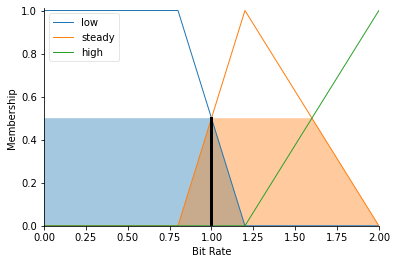

In [127]:
# FDASH.input['Buffering size B'] = 30
# FDASH.input['Buffering size diff ΔB (b)'] = -5
# FDASH.input['Bit Rate'] = 1

# FDASH.compute()

FDASH.input['Buffering size B'] = 50
FDASH.input['Buffering size diff ΔB (b)'] = -1
FDASH.input['Bit Rate'] = 1

FDASH.compute()

output = FDASH.output['Factor']
print("Output: fator de acréscimo/decréscimo =", output)
rate.view(sim=FDASH)